In [3]:
from fonctions import *
import fonctions
import math
import importlib
import mesa
from math import inf
from mesa import Agent
from mesa import Model
from mesa.time import RandomActivation
from mesa.time import BaseScheduler

importlib.reload(fonctions)

<module 'fonctions' from 'C:\\Users\\hicha\\OneDrive\\Bureau\\étude\\ICO\\data_PTV_Fil_rouge\\fonctions.py'>

In [9]:
data_depot = pd.read_csv('data_depot.csv')
data_client_index = pd.read_csv('data_clients.csv')



with open('distance_matrix.pickle', 'rb') as handle:
    distance_matrix = pickle.load(handle)

with open('times.pickle', 'rb') as handle:
    times = pickle.load(handle)



n = 50

data_depot = data_depot.iloc[:n]
data_client_index = data_client_index.iloc[:n]
distance_matrix = distance_matrix[:n , :n]
times = times[:n,:]

In [25]:
def creation_pop(nb):
    pop=[]
    for i in range(nb):
        T = [i for i in range(n)]
        np.random.shuffle(T)
        pop.append(T.copy())
    return(pop)


def fitness(pop):
    long=[]
    
    for i in range(len(pop)):
        
        cout_m=cout_fonction(code_to_X(pop[i]))
        long.append(cout_m)
        
    return long


def tri_pop(pop):
    #tri selon la longueur de la liste
    long=fitness(pop)
    for i in range(0,len(pop)-1) :
        # de 0 à n-2
        indmin = i
        for j in range(i+1,len(pop)) : # de i+1 à n-1, recherche du min
            if long[j] < long[indmin] : indmin = j
        long[indmin],long[i]=long[i],long[indmin] 
        pop[indmin],pop[i]=pop[i],pop[indmin] 
    return pop,long


def inverse(L): #return 1/L
    
    c=[]
    k=min(L)
    p=max(L)
    
    for i in range(len(L)):
        c.append((p-k+1)/(L[i]-k+1))
        
    return(c)


def choix_pop(pop,k):

    pop_tri,long=tri_pop(pop)
    long1=inverse(long)
    
    return(random.choices(pop_tri, long1, k=k ))

def croisement(L1,L2):
    
    n=len(L1)
    i=random.choice(range(0,n))
    j=random.choice(range(0,n))
    
    l1=L1[i:j]
    l2=L2[i:j]
    
    L1[i:j] = l2
    L2[i:j] = l1

    return(L1,L2)

def mutation(List):
    
    m=len(List)
   
    j = random.randint(0,m-1)
    i=random.randint(0,m-1)
    
    List[i],List[j]=List[j],List[i]
    
    
    

def step(nb_gen,nb,k,v):
    
    i=0
    
    pop=creation_pop(nb)
    best_pop=[]
    best_long=[]
    
    
    while i<=nb_gen:

        new_pop=choix_pop(pop,k)
        pop_suiv=[]
        
        
        for j in range(nb//2):
            
                parent1=random.choice(new_pop)
                parent2=random.choice(new_pop)
                T_kid1,T_kid2=croisement(parent1,parent2)
                #T_kid1,T_kid2=croisement2(parent1,parent2,PO)
                p=random.uniform(0,1)

                if p<v:
                    mutation(T_kid1)
                    mutation(T_kid2)

                pop_suiv.append(T_kid1)
                pop_suiv.append(T_kid2)

        i+=1
        pop=pop_suiv
        pop_tri,long=tri_pop(pop)
        
        if len(best_long)!=0:
            if long[0]<=best_long[-1]:
                best_long.append(long[0])
                best_pop.append(pop_tri[0])
            else:
                best_long.append(best_long[-1])
                best_pop.append(best_pop[-1])
        else:
            best_long.append(long[0])
            best_pop.append(pop_tri[0])
            
     
    
    return best_long ,  best_pop

In [27]:
best_long , best_pop = step(100,5,2,0.1)

In [28]:
best_long

[807.8258988568384,
 807.8258988568384,
 807.8258988568384,
 807.8258988568384,
 807.8258988568384,
 807.8258988568384,
 807.8258988568384,
 807.8258988568384,
 807.8258988568384,
 807.8258988568384,
 807.8258988568384,
 807.8258988568384,
 807.8258988568384,
 801.7512931328183,
 801.7512931328183,
 801.7512931328183,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,
 776.3455125396963,


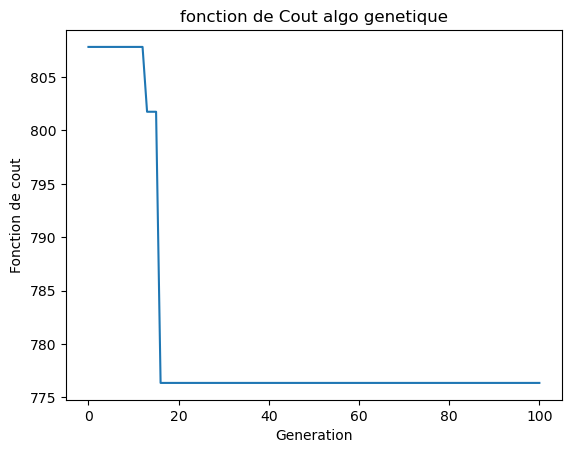

In [33]:
plt.plot(best_long)
plt.xlabel('Generation')
plt.ylabel('Fonction de cout')
plt.title("fonction de Cout algo genetique")
plt.savefig("fonction de Cout algo genetique")